# Create Simulation Figures

Run all cells to create figures from simulated data generated by:
- run_ensemble.py
- single_cell_metastasis.py
- synchronous_met.py

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import EpiClockNBL.src.util as nbl_util
nbl_consts = nbl_util.consts

In [ ]:
import simulation as sim

In [5]:
figure_outdir = 'figures'
os.makedirs(figure_outdir, exist_ok=True)

In [ ]:
# Configure graph
sf = nbl_consts['sf']
sns.set(rc={"savefig.bbox":'tight', 'axes.linewidth':sf}, font_scale=1, style='ticks')

### Ensemble of 90 sites

In [6]:
prog_params = {'output_dir':'90_sites_3_years_2', 'n_CpGs_each':1, 'flip_rate':0.005, 'death_rate':0.14, 'nyears':1.25, 'seed':0,
              'prolif_rate':0.17}

init_params = {'flip_rate':prog_params['flip_rate'], # flip rate per cell division per allele
               'prolif_rate':prog_params['prolif_rate'], # cell divisions per day
               'death_rate':prog_params['death_rate'], # cell deaths per day,
               'init_site_state_counts':[prog_params['n_CpGs_each'], prog_params['n_CpGs_each'], 0, prog_params['n_CpGs_each']],
              }
gen = np.random.default_rng(0)
ensmbl = sim.Ensemble(init_params, gen, split=True, split_limit=20, n_split=4,
                      max_cells=50
                     )

# ensmbl_con = sim.EnsembleContainer()
# ensmbl_con.addEnsemble(ensmbl)

Allocated memory!


In [7]:
# print(ensmbl.state_arr[ensmbl.living_cells])
# print(ensmbl_con.getCombinedActiveStateArr())

In [8]:
# splits = ensmbl.returnEnsembleSplits()
# for spl in splits:
#     print(spl.state_arr[spl.living_cells])

In [9]:
# response = ensmbl.passDay()
# print(response['result'])
# print(ensmbl.getNumCells())
# print(ensmbl.state_arr[ensmbl.living_cells])

In [167]:
response = ensmbl_con.passDay()
print(response)
print(ensmbl_con.getNumCells())
# print(ensmbl.state_arr[ensmbl.living_cells])
print('#'*50)
print(ensmbl_con.getCombinedActiveStateArr())
print(f'{ensmbl_con.getNumEnsembles()} ensembles')

for i, ensmbl in enumerate(ensmbl_con.ensmbl_list):
    print('#'*50 + f'  -  {i}')
    print(ensmbl.state_arr[ensmbl.living_cells])

True
18
##################################################
[[0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 1]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 1]]
4 ensembles
##################################################  -  0
[[0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]]
##################################################  -  1
[[0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 3]]
##################################################  -  2
[[0 1 3]
 [0 1 3]
 [0 1 3]]
##################################################  -  3
[[0 1 1]
 [0 1 3]
 [0 1 3]
 [0 1 3]
 [0 1 1]]


In [20]:
splits = response['data']
for spl in splits:
    print('###########')
    print(spl.state_arr[spl.living_cells])

TypeError: 'bool' object is not subscriptable

In [28]:
l = ['apple', 'banana', 'orange', 'foo', 'bar', 'newbar']

In [40]:
n_cells = len(l)
n_split = 8

slice_idxs = list(map(int, np.linspace(0, n_cells, n_split+1)))
print(f'slice_idxs: {slice_idxs}')
new_ens_list = []
for i in range(len(slice_idxs) - 1):
    start = slice_idxs[i]
    stop = slice_idxs[i+1]
    n_cells_new = stop - start
    print(l[slice(start, stop)])

slice_idxs: [0, 0, 1, 2, 3, 3, 4, 5, 6]
[]
['apple']
['banana']
['orange']
[]
['foo']
['bar']
['newbar']


In [ ]:
params_idx = 5

params_list = [
    {'output_dir':'3_sites', 'n_CpGs_each':1, 'death_rate':0.15, 'nyears':2, 'seed':0},
    {'output_dir':'90_sites', 'n_CpGs_each':30, 'death_rate':0.15, 'nyears':2, 'seed':0},
    {'output_dir':'larger_death_rate', 'n_CpGs_each':1, 'death_rate':0.16, 'nyears':4, 'seed':0},
    # For neuroblastoma
    {'output_dir':'90_sites_3_years', 'n_CpGs_each':30, 'death_rate':0.16, 'nyears':3, 'seed':0},
    {'output_dir':'90_sites_3_years_2', 'n_CpGs_each':30, 'flip_rate':0.005, 'death_rate':0.14, 'nyears':1.25, 'seed':0},
    ### New simulations
    {'output_dir':'new_test_dec23', 'n_CpGs_each':30, 'death_rate':0.15, 'nyears':2, 'seed':2},
]
prog_params = params_list[params_idx]


# Constant parameters
FLIP_RATE = 0.002
PROLIF_RATE = 0.17

if 'flip_rate' not in prog_params:
    prog_params['flip_rate'] = FLIP_RATE
if 'prolif_rate' not in prog_params:
    prog_params['prolif_rate'] = PROLIF_RATE


init_params = {'flip_rate':prog_params['flip_rate'], # flip rate per cell division per allele
               'prolif_rate':prog_params['prolif_rate'], # cell divisions per day
               'death_rate':prog_params['death_rate'], # cell deaths per day,
               'init_site_state_counts':[prog_params['n_CpGs_each'], prog_params['n_CpGs_each'], 0, prog_params['n_CpGs_each']],
              }
gen = np.random.default_rng(prog_params['seed'])
ensmbl = sim.Ensemble(init_params, gen, max_cells=int(1e7))

Allocated memory!


In [7]:
i = 0

In [8]:
while i < 400:
    ensmbl.passDay()
    n_cells = ensmbl.getNumCells()
    print(f'Day {i} -------- {n_cells} cells')
    i += 1

Day 0 -------- 1 cells
Day 1 -------- 1 cells
Day 2 -------- 1 cells
Day 3 -------- 1 cells
Day 4 -------- 1 cells
Day 5 -------- 1 cells
Day 6 -------- 1 cells
Day 7 -------- 1 cells
Day 8 -------- 2 cells
Day 9 -------- 2 cells
Day 10 -------- 2 cells
Day 11 -------- 2 cells
Day 12 -------- 3 cells
Day 13 -------- 4 cells
Day 14 -------- 4 cells
Day 15 -------- 5 cells
Day 16 -------- 4 cells
Day 17 -------- 3 cells
Day 18 -------- 2 cells
Day 19 -------- 2 cells
Day 20 -------- 3 cells
Day 21 -------- 2 cells
Tumor died
Day 22 -------- 1 cells
Day 23 -------- 2 cells
Day 24 -------- 2 cells
Day 25 -------- 2 cells
Day 26 -------- 1 cells
Day 27 -------- 2 cells
Day 28 -------- 4 cells
Day 29 -------- 5 cells
Day 30 -------- 6 cells
Day 31 -------- 6 cells
Day 32 -------- 4 cells
Day 33 -------- 6 cells
Day 34 -------- 5 cells
Day 35 -------- 6 cells
Day 36 -------- 7 cells
Day 37 -------- 6 cells
Day 38 -------- 6 cells
Day 39 -------- 5 cells
Day 40 -------- 6 cells
Day 41 --------

In [15]:
# j = 410
while j < 420:
    new_ens.passDay()
    n_cells = new_ens.getNumCells()
    print(f'Day {j} -------- {n_cells} cells')
    j += 1

Day 410 -------- 17933 cells
Day 411 -------- 18232 cells
Day 412 -------- 18632 cells
Day 413 -------- 18910 cells
Day 414 -------- 19268 cells
Day 415 -------- 19705 cells
Day 416 -------- 20068 cells
Day 417 -------- 20544 cells
Day 418 -------- 20872 cells
Day 419 -------- 21306 cells


In [16]:
np.all(ensmbl.state_arr[ensmbl.living_cells] == new_ens.state_arr[new_ens.living_cells])

True

In [9]:
# import datetime
# import pickle
# import json

# saveAsDirectory(ensmbl)

ensmbl.saveAsDirectory('save1')


In [10]:
new_ens = sim.loadFromDirectory(suffix='save1')

loading
done loading
reallocating memory
Allocated memory!


In [28]:
# ensemble = Ensemble()

# ensemble grow to 1e7 cells
# split into 10 ensembles


### Recombine data from splits

In [57]:
# send_dir = 'send_flip005'
send_dir = 'send_flip0075'

In [ ]:
basedir = send_dir

outdir_base = os.path.join(basedir, '90_sites_NB_split_base')
split_parent_outdir = os.path.join(basedir, '90_sites_NB_split_splitOutputs')

split_jobs = np.loadtxt(os.path.join(outdir_base, 'split_jobs.txt'), dtype='str')

In [59]:
n_cells_ser_list = []
beta_values_arr_dict = {}

# Base
n_cells_arr = np.loadtxt(os.path.join(outdir_base, 'n_cells.txt'), dtype='float')
n_cells_ser = pd.DataFrame(n_cells_arr, columns=['day', 'n_cells'])
n_cells_ser['day'] = n_cells_ser['day'].astype(int)
n_cells_ser = n_cells_ser.set_index('day').squeeze('columns').rename('base')
n_cells_ser_list.append(n_cells_ser)
beta_values_arr_dict['base'] = np.loadtxt(os.path.join(outdir_base, 'beta_values.txt'), delimiter='\t', dtype='float').T

for sj in split_jobs:
    indir = os.path.join(split_parent_outdir, sj)
    
    beta_values_arr_dict[sj] = np.loadtxt(os.path.join(indir, 'beta_values.txt'), delimiter='\t', dtype='float').T
    n_cells_arr = np.loadtxt(os.path.join(indir, 'n_cells.txt'), dtype='float')
    n_cells_ser = pd.DataFrame(n_cells_arr, columns=['day', 'n_cells'])
    n_cells_ser['day'] = n_cells_ser['day'].astype(int)
    n_cells_ser = n_cells_ser.set_index('day').squeeze('columns').rename(sj)
    n_cells_ser_list.append(n_cells_ser)

n_cells_df = pd.concat(n_cells_ser_list, axis=1)

# Deal with issue of row at splitting day
joint_row_filter = (~n_cells_df.isna()).all(axis=1)
# assert joint_row_filter.sum() == 1
# assert n_cells_df.loc[joint_row_filter, 'base'].values[0] == n_cells_df.loc[joint_row_filter, n_cells_df.columns != 'base'].sum(axis=1).values[0]
n_cells_df.loc[joint_row_filter, 'base'] = 0

# Handle edge case
isna_sum = n_cells_df.iloc[-50:, 1:].isna().sum(axis=1)
bad_days = isna_sum.index[isna_sum > 0].values
# assert len(bad_days) == 0
# assert bad_days[0] == max(isna_sum.index)
n_cells_df = n_cells_df.loc[~n_cells_df.index.isin(bad_days)]


# Calculate total
n_cells_total = n_cells_df.fillna(0).sum(axis=1)

# Calculate frequencies
cell_freqs = n_cells_df.fillna(0).apply(lambda x:x/x.sum(), axis=1)


In [60]:
n_CpGs = beta_values_arr_dict['base'].shape[0] - 1
n_days = cell_freqs.shape[0]
beta_values_total = pd.DataFrame(data=np.zeros(shape=(n_CpGs, n_days)), columns=cell_freqs.index)

for simn in cell_freqs.columns:
    beta_values_arr = beta_values_arr_dict[simn]

    days = beta_values_arr[0].astype(int)
    beta_values_arr_justValues = beta_values_arr[1:]

    filt = ~np.isin(days, bad_days)
    days = days[filt]
    beta_values_arr_justValues = beta_values_arr_justValues[:, filt]

    simn_beta_norm = np.matmul(
        beta_values_arr_justValues,
        np.diag(cell_freqs.loc[days, simn].values)
    )

    for i in range(simn_beta_norm.shape[1]):
        beta_values_total[days[i]] += simn_beta_norm[:, i]

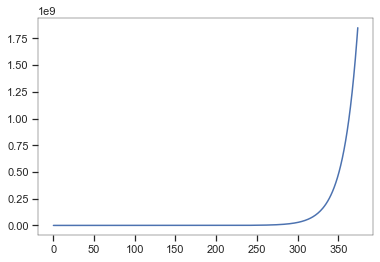

In [61]:
plt.plot(n_cells_total.index, n_cells_total)

In [62]:
n_cells_total

day
0      1.000000e+00
1      1.000000e+00
2      2.000000e+00
3      3.000000e+00
4      2.000000e+00
           ...     
370    1.474035e+09
371    1.560141e+09
372    1.651290e+09
373    1.747737e+09
374    1.849828e+09
Length: 375, dtype: float64

### Histograms at time checkpoints

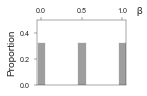

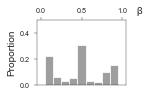

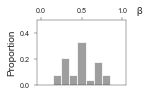

In [ ]:
# datadir = '90_sites_NB_split'

####################################################################################
####################################################################################
####################################################################################

# Figure params
figsize = np.array([4, 3])
color_list = [nbl_consts['palette_jco'][i] for i in [0, 1, 3]]

# Import data
beta_values_arr = beta_values_total.values

# Num CpGs in each group
n_CpGs_each = 30

# Configure time checkpoints
total_days = beta_values_arr.shape[1] - 1
# time_checkpoints = [0, int(total_days/2), total_days]
time_checkpoints = [
    int(0),
    int(365 / 2),
    int(365)
]

# At each checkpoint, plot a histogram of beta values across the sites
k = 0    # Index just for figure filename
for chk in time_checkpoints:
    
    # Create plot
    fig, ax = plt.subplots(figsize=figsize * sf)
    sim.plotBetaValues(ax, beta_values=beta_values_arr[:, chk],
                   binwidth=0.1, color=nbl_consts['palette_jco'][2], opacity=nbl_consts['opacity'],
                   labelfontsize=nbl_consts['labelfontsize'], ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, bins=np.linspace(-0.05, 1.05, 12))
    ax.set_ylim(0, 0.5)

    ax.tick_params(axis='x', which='both',
              bottom=False, top=True, labelbottom=False, labeltop=True
              )
    ax.xaxis.set_label_coords(1.15, 1.2)

    # Save figure
    fig.savefig(os.path.join(figure_outdir, f'simulation_300_sites_hist_{k}.svg'), format='svg', pad_inches=0.1)
    
    k += 1

In [13]:
(1 + 0.5 - 0.47079)**(2*365)

1342511423.9911268

In [15]:
(1 + 0.5 - 0.47079)

1.02921

In [37]:
import numpy as np
np.exp((0.5 - 0.47079) * 50)

4.308113046444041

In [23]:
(1 + 0.5 - 0.47079)**(25)

2.0539975969491326

In [39]:
alpha = 0.5
lambda_ = 0.47079
sigma2 = (1 + 3*alpha - lambda_) - (1 + alpha - lambda_)**2
m = 1 + 0.5 - 0.47079

t = 25

sigma2 * m**(t-1) * (m**t - 1) / (m - 1)

69.84694635564706

In [38]:
format(
    # 68*(1 + 0.5 - 0.47079)**200,
    24*(1 + 0.5 - 0.47079)**30,
    ','
)

'56.92868591518901'

### Trajectories of beta values of sites

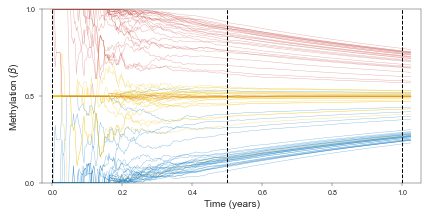

In [ ]:
beta_values_arr = beta_values_total.values


# Figure params
figsize = np.array([17, 8])
color_list = [nbl_consts['palette_jco'][i] for i in [0, 1, 3]]

# Process data
# Create a dataframe for each group of CpGs
# Set the "variable" column
data_list = []
for j in range(3):
    data = pd.melt(pd.DataFrame(
        beta_values_arr[j*n_CpGs_each:(j+1)*n_CpGs_each]
    ).T.reset_index(), ['index'])
    data['Year'] = data['index'] / 365
    data['variable'] += n_CpGs_each * j
    data_list.append(data)

# Concatenate dataframes
plot_data = pd.concat(data_list, axis=0)

# Extract number of years
nyears = plot_data['Year'].max()

# Set palette to match groups of CpGs
palette = np.concatenate([[color]*n_CpGs_each for color in color_list]).tolist()

# Create plot
fig, ax = plt.subplots(figsize=figsize * sf)
plot = sns.lineplot(ax=ax, x='Year', y='value', data=plot_data,
                    hue='variable', palette=palette,
                    linestyle='solid', linewidth=sf, alpha=0.5
                   )

# Move x-ticks and x-axis labels to be on top of he figure
ax.tick_params(axis='x', which='both',
              # bottom=False, top=True, labelbottom=False, labeltop=True
              )
# ax.xaxis.set_label_coords(0.5, 1.15)
# ax.yaxis.set_label_coords(0.0, 1.07)
ax.set_ylabel('Methylation ($β$)',
              # rotation=0,
              fontsize=nbl_consts['labelfontsize'] * sf)

# Customize figure
xlim = (-0.03, nyears + 0.03)
ax.set_ylim(0, 1)
ax.set_xlim(xlim)
ax.set_yticks([0, 0.5, 1])
ax.tick_params(axis='both', labelsize=nbl_consts['ticksfontsize'] * sf, width=sf, length=8 * sf)
ax.set_xlabel('Time (years)', fontsize=nbl_consts['labelfontsize'] * sf)
ax.legend('', frameon=False)

# Add vertical lines at time checkpoints
for t in time_checkpoints:
    ax.axvline(x = t / 365, linestyle='dashed', color='black', linewidth=2.5 * sf)

# Save figure
fig.savefig(os.path.join(figure_outdir, 'simulation_300_sites_split.svg'), format='svg', pad_inches=0.1)

Fig3B_plot_data = plot_data

In [152]:
# format(1e7/200, ',')